<a href="https://colab.research.google.com/github/Perkyson/assignment/blob/main/SR_TRADITIONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTAL KAGGLE AND LOAD THE DATASETS**

In [1]:
!pip install -q kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"perkysonshadap","key":"bc970497aefd9ab34b0e4e4287b70d47"}'}

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
cp kaggle.json ~/.kaggle/

In [11]:
! chmod 600 /root/.kaggle/kaggle.json

In [12]:
!kaggle datasets download 'bijaygurung/set5-superresolution'

Dataset URL: https://www.kaggle.com/datasets/bijaygurung/set5-superresolution
License(s): unknown
  0% 0.00/2.03M [00:00<?, ?B/s]
100% 2.03M/2.03M [00:00<00:00, 74.5MB/s]


In [13]:
!unzip /content/set5-superresolution.zip

Archive:  /content/set5-superresolution.zip
  inflating: Set5/GTmod12/baby.png   
  inflating: Set5/GTmod12/bird.png   
  inflating: Set5/GTmod12/butterfly.png  
  inflating: Set5/GTmod12/head.png   
  inflating: Set5/GTmod12/woman.png  
  inflating: Set5/LRbicx2/baby.png   
  inflating: Set5/LRbicx2/bird.png   
  inflating: Set5/LRbicx2/butterfly.png  
  inflating: Set5/LRbicx2/head.png   
  inflating: Set5/LRbicx2/woman.png  
  inflating: Set5/LRbicx3/baby.png   
  inflating: Set5/LRbicx3/bird.png   
  inflating: Set5/LRbicx3/butterfly.png  
  inflating: Set5/LRbicx3/head.png   
  inflating: Set5/LRbicx3/woman.png  
  inflating: Set5/LRbicx4/baby.png   
  inflating: Set5/LRbicx4/bird.png   
  inflating: Set5/LRbicx4/butterfly.png  
  inflating: Set5/LRbicx4/head.png   
  inflating: Set5/LRbicx4/woman.png  
  inflating: Set5/original/baby.png  
  inflating: Set5/original/bird.png  
  inflating: Set5/original/butterfly.png  
  inflating: Set5/original/head.png  
  inflating: Set5/origi

In [14]:
!kaggle datasets download 'guansuo/set14dataset'

Dataset URL: https://www.kaggle.com/datasets/guansuo/set14dataset
License(s): unknown
 85% 14.0M/16.5M [00:00<00:00, 74.0MB/s]
100% 16.5M/16.5M [00:00<00:00, 80.1MB/s]


In [15]:
!unzip /content/set14dataset.zip

Archive:  /content/set14dataset.zip
  inflating: Set14/image_SRF_2/img_001_SRF_2_HR.png  
  inflating: Set14/image_SRF_2/img_001_SRF_2_LR.png  
  inflating: Set14/image_SRF_2/img_002_SRF_2_HR.png  
  inflating: Set14/image_SRF_2/img_002_SRF_2_LR.png  
  inflating: Set14/image_SRF_2/img_003_SRF_2_HR.png  
  inflating: Set14/image_SRF_2/img_003_SRF_2_LR.png  
  inflating: Set14/image_SRF_2/img_004_SRF_2_HR.png  
  inflating: Set14/image_SRF_2/img_004_SRF_2_LR.png  
  inflating: Set14/image_SRF_2/img_005_SRF_2_HR.png  
  inflating: Set14/image_SRF_2/img_005_SRF_2_LR.png  
  inflating: Set14/image_SRF_2/img_006_SRF_2_HR.png  
  inflating: Set14/image_SRF_2/img_006_SRF_2_LR.png  
  inflating: Set14/image_SRF_2/img_007_SRF_2_HR.png  
  inflating: Set14/image_SRF_2/img_007_SRF_2_LR.png  
  inflating: Set14/image_SRF_2/img_008_SRF_2_HR.png  
  inflating: Set14/image_SRF_2/img_008_SRF_2_LR.png  
  inflating: Set14/image_SRF_2/img_009_SRF_2_HR.png  
  inflating: Set14/image_SRF_2/img_009_SRF_2_L

INSTALL LIBRARIES

In [16]:
pip install opencv-python numpy matplotlib

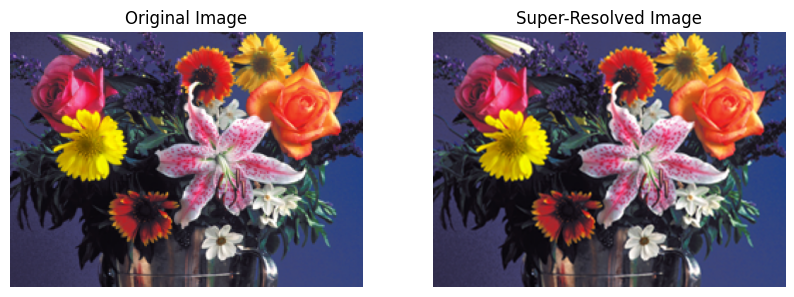

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load an image from the specified path."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found. Please check the path.")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def super_resolve(image, scale_factor, interpolation_method):
    """Perform super-resolution on the image using the specified interpolation method."""
    # Get the dimensions of the original image
    height, width = image.shape[:2]

    # Calculate new dimensions
    new_dimensions = (int(width * scale_factor), int(height * scale_factor))

    # Perform interpolation
    if interpolation_method == 'bilinear':
        super_resolved_image = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_LINEAR)
    elif interpolation_method == 'bicubic':
        super_resolved_image = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_CUBIC)
    else:
        raise ValueError("Unsupported interpolation method. Use 'bilinear' or 'bicubic'.")

    return super_resolved_image

def display_images(original, super_resolved):
    """Display the original and super-resolved images side by side."""
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Super-Resolved Image")
    plt.imshow(super_resolved)
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    # Load the image
    image_path = '/content/Set14/image_SRF_2/img_007_SRF_2_LR.png'  # Replace with your image path
    original_image = load_image(image_path)

    # Set the scale factor and interpolation method
    scale_factor = 2  # Example: 2x upscaling
    interpolation_method = 'bicubic'  # Choose 'bilinear' or 'bicubic'

    # Perform super-resolution
    super_resolved_image = super_resolve(original_image, scale_factor, interpolation_method)

    # Display the results
    display_images(original_image, super_resolved_image)

<ipython-input-18-262f715725d1>:42: RuntimeWarning: overflow encountered in scalar add
  hr_image[y, x] = (hr_image[y, x - 1] + hr_image[y, x + 1]) / 2
<ipython-input-18-262f715725d1>:44: RuntimeWarning: overflow encountered in scalar add
  hr_image[y, x] = (hr_image[y - 1, x] + hr_image[y + 1, x]) / 2


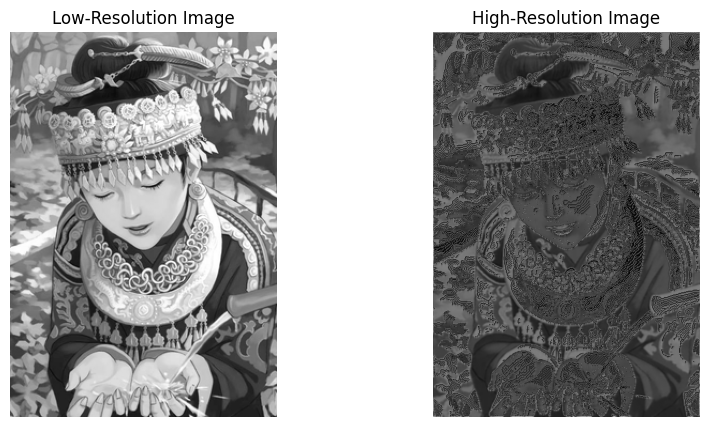

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_gradients(image):
    """
    Compute gradients of the image using Sobel operators.
    """
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    return grad_x, grad_y

def multisurface_interpolation(lr_image, scale):
    """
    Perform super-resolution using multisurface fitting interpolation.
    Args:
        lr_image: Low-resolution grayscale image (2D array).
        scale: Upscaling factor (e.g., 2 for doubling the size).
    Returns:
        hr_image: High-resolution image (2D array).
    """
    # Resize the LR image to the target HR size using bicubic interpolation as a baseline
    lr_height, lr_width = lr_image.shape
    hr_height, hr_width = lr_height * scale, lr_width * scale
    hr_image = cv2.resize(lr_image, (hr_width, hr_height), interpolation=cv2.INTER_CUBIC)

    # Compute gradients of the LR image
    grad_x, grad_y = compute_gradients(lr_image)

    # Upscale gradients to match HR size
    grad_x_hr = cv2.resize(grad_x, (hr_width, hr_height), interpolation=cv2.INTER_LINEAR)
    grad_y_hr = cv2.resize(grad_y, (hr_width, hr_height), interpolation=cv2.INTER_LINEAR)

    # Adjust HR image intensities using upscaled gradients
    for y in range(1, hr_height - 1):
        for x in range(1, hr_width - 1):
            gx = grad_x_hr[y, x]
            gy = grad_y_hr[y, x]

            # Local adjustment based on gradient direction
            if abs(gx) > abs(gy):
                hr_image[y, x] = (hr_image[y, x - 1] + hr_image[y, x + 1]) / 2
            else:
                hr_image[y, x] = (hr_image[y - 1, x] + hr_image[y + 1, x]) / 2

    return hr_image

# Example usage
if __name__ == "__main__":
    # Read a grayscale image
    lr_image = cv2.imread("/content/Set14/image_SRF_3/img_005_SRF_3_HR.png", cv2.IMREAD_GRAYSCALE)
    if lr_image is None:
        raise FileNotFoundError("Input image not found!")

    # Perform super-resolution
    scale_factor = 2
    hr_image = multisurface_interpolation(lr_image, scale_factor)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Low-Resolution Image")
    plt.imshow(lr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("High-Resolution Image")
    plt.imshow(hr_image, cmap="gray")
    plt.axis("off")

    plt.show()


INTERPOLATION METHOD

PSNR: 32.99 dB
SSIM: 0.7992


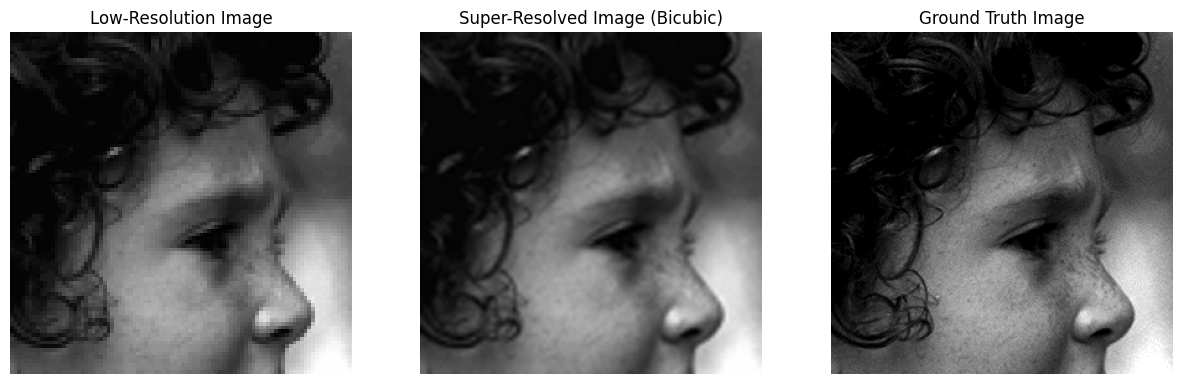

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def compute_psnr(hr_image, sr_image):
    """
    Compute Peak Signal-to-Noise Ratio (PSNR).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        psnr_value: PSNR value in dB.
    """
    mse = np.mean((hr_image - sr_image) ** 2)
    if mse == 0:
        return float('inf')  # PSNR is infinite for identical images
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

def compute_ssim(hr_image, sr_image):
    """
    Compute Structural Similarity Index (SSIM).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        ssim_value: SSIM value in the range [-1, 1].
    """
    ssim_value, _ = ssim(hr_image, sr_image, full=True)
    return ssim_value

def bicubic_interpolation(lr_image, scale):
    """
    Perform super-resolution using bicubic interpolation.
    Args:
        lr_image: Low-resolution grayscale image (2D array).
        scale: Upscaling factor (e.g., 2 for doubling the size).
    Returns:
        sr_image: Super-resolved image (2D array).
    """
    lr_height, lr_width = lr_image.shape
    sr_height, sr_width = lr_height * scale, lr_width * scale
    sr_image = cv2.resize(lr_image, (sr_width, sr_height), interpolation=cv2.INTER_CUBIC)
    return sr_image

# Main code
if __name__ == "__main__":
    # Load low-resolution (LR) and ground truth high-resolution (HR) images
    lr_image = cv2.imread("/content/Set14/image_SRF_3/img_006_SRF_3_LR.png", cv2.IMREAD_GRAYSCALE)
    hr_image = cv2.imread("/content/Set14/image_SRF_3/img_006_SRF_3_HR.png", cv2.IMREAD_GRAYSCALE)

    if lr_image is None or hr_image is None:
        raise FileNotFoundError("One or both input images not found!")

    # Perform bicubic interpolation for super-resolution
    scale_factor = hr_image.shape[0] // lr_image.shape[0]  # Assuming square scaling
    sr_image = bicubic_interpolation(lr_image, scale_factor)

    # Compute PSNR and SSIM
    psnr_value = compute_psnr(hr_image, sr_image)
    ssim_value = compute_ssim(hr_image, sr_image)

    # Print the metrics
    print(f"PSNR: {psnr_value:.2f} dB")
    print(f"SSIM: {ssim_value:.4f}")

    # Visualize the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Low-Resolution Image")
    plt.imshow(lr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Super-Resolved Image (Bicubic)")
    plt.imshow(sr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Ground Truth Image")
    plt.imshow(hr_image, cmap="gray")
    plt.axis("off")

    plt.show()


PSNR: 37.53 dB
SSIM: 0.9748
MSE: 11.4769


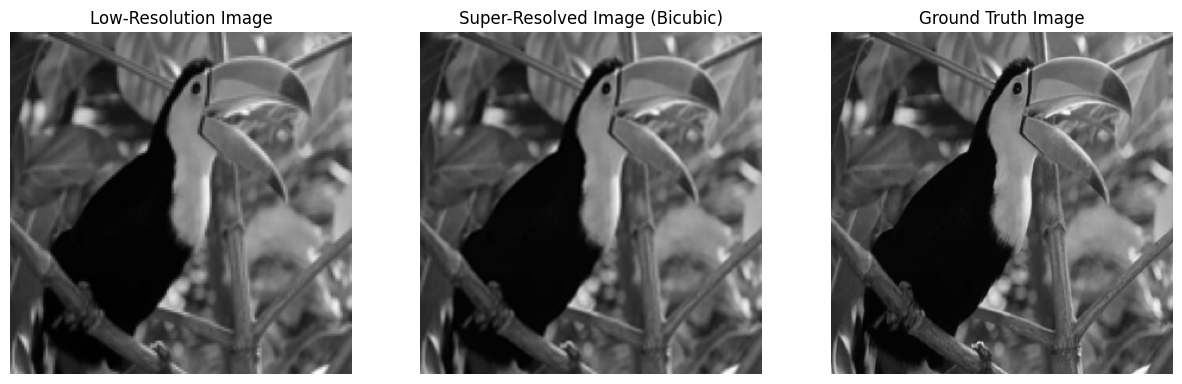

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def compute_psnr(hr_image, sr_image):
    """
    Compute Peak Signal-to-Noise Ratio (PSNR).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        psnr_value: PSNR value in dB.
    """
    mse = np.mean((hr_image - sr_image) ** 2)
    if mse == 0:
        return float('inf')  # PSNR is infinite for identical images
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

def compute_ssim(hr_image, sr_image):
    """
    Compute Structural Similarity Index (SSIM).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        ssim_value: SSIM value in the range [-1, 1].
    """
    ssim_value, _ = ssim(hr_image, sr_image, full=True)
    return ssim_value

def compute_mse(hr_image, sr_image):
    """
    Compute Mean Squared Error (MSE).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        mse_value: MSE value.
    """
    mse_value = np.mean((hr_image - sr_image) ** 2)
    return mse_value

def bicubic_interpolation(lr_image, scale):
    """
    Perform super-resolution using bicubic interpolation.
    Args:
        lr_image: Low-resolution grayscale image (2D array).
        scale: Upscaling factor (e.g., 2 for doubling the size).
    Returns:
        sr_image: Super-resolved image (2D array).
    """
    lr_height, lr_width = lr_image.shape
    sr_height, sr_width = lr_height * scale, lr_width * scale
    sr_image = cv2.resize(lr_image, (sr_width, sr_height), interpolation=cv2.INTER_CUBIC)
    return sr_image

# Main code
if __name__ == "__main__":
    # Load low-resolution (LR) and ground truth high-resolution (HR) images
    lr_image = cv2.imread("/content/Set5/LRbicx2/bird.png", cv2.IMREAD_GRAYSCALE)
    hr_image = cv2.imread("/content/Set5/original/bird.png", cv2.IMREAD_GRAYSCALE)

    if lr_image is None or hr_image is None:
        raise FileNotFoundError("One or both input images not found!")

    # Perform bicubic interpolation for super-resolution
    scale_factor = hr_image.shape[0] // lr_image.shape[0]  # Assuming square scaling
    sr_image = bicubic_interpolation(lr_image, scale_factor)

    # Compute PSNR, SSIM, and MSE
    psnr_value = compute_psnr(hr_image, sr_image)
    ssim_value = compute_ssim(hr_image, sr_image)
    mse_value = compute_mse(hr_image, sr_image)

    # Print the metrics
    print(f"PSNR: {psnr_value:.2f} dB")
    print(f"SSIM: {ssim_value:.4f}")
    print(f"MSE: {mse_value:.4f}")

    # Visualize the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Low-Resolution Image")
    plt.imshow(lr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Super-Resolved Image (Bicubic)")
    plt.imshow(sr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Ground Truth Image")
    plt.imshow(hr_image, cmap="gray")
    plt.axis("off")

    plt.show()

Interpolation Method: Linear
PSNR: 36.02 dB
SSIM: 0.9586
MSE: 16.2426


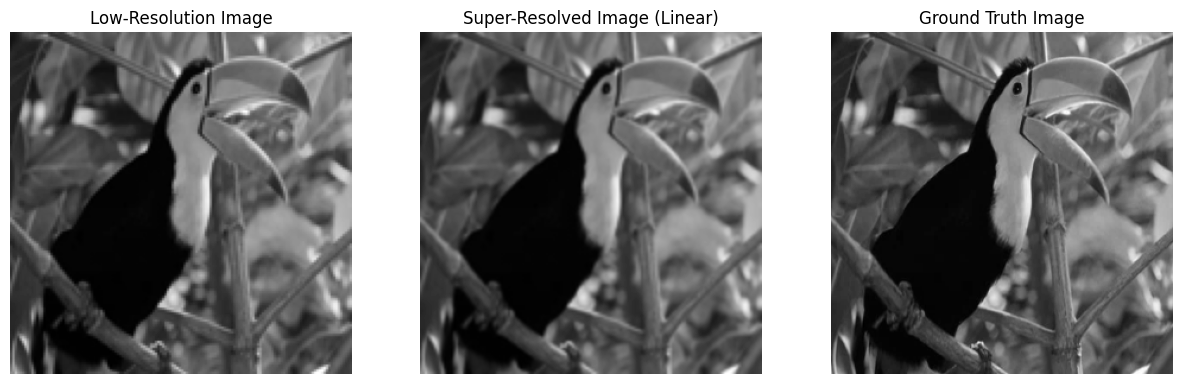

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import skimage.transform
import matplotlib.pyplot as plt

def compute_psnr(hr_image, sr_image):
    """
    Compute Peak Signal-to-Noise Ratio (PSNR).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        psnr_value: PSNR value in dB.
    """
    mse = np.mean((hr_image - sr_image) ** 2)
    if mse == 0:
        return float('inf')  # PSNR is infinite for identical images
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

def compute_ssim(hr_image, sr_image):
    """
    Compute Structural Similarity Index (SSIM).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        ssim_value: SSIM value in the range [-1, 1].
    """
    ssim_value, _ = ssim(hr_image, sr_image, full=True)
    return ssim_value

def compute_mse(hr_image, sr_image):
    """
    Compute Mean Squared Error (MSE).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        mse_value: MSE value.
    """
    mse_value = np.mean((hr_image - sr_image) ** 2)
    return mse_value

def interpolation_lib(img, mode_type, factor=None):
    """
    Perform image interpolation using various methods.
    Args:
        img: Input low-resolution image (2D array).
        mode_type: Interpolation method (e.g., 'Cubic', 'Linear').
        factor: Scaling factor for upscaling.
    Returns:
        img: Super-resolved image (2D array).
    """
    if mode_type == "Cubic Spline":
        img = skimage.transform.resize(
            img, (img.shape[0] * factor, img.shape[1] * factor), order=3, anti_aliasing=False
        )
        return img
    elif mode_type == "Linear":
        mode = cv2.INTER_LINEAR
    elif mode_type == "Nearest":
        mode = cv2.INTER_NEAREST
    elif mode_type == "Cubic":
        mode = cv2.INTER_CUBIC
    elif mode_type == "Lanczos4":
        mode = cv2.INTER_LANCZOS4
    else:
        raise ValueError(f"Unknown mode_type: {mode_type}")

    img = cv2.resize(img, (0, 0), fx=factor, fy=factor, interpolation=mode)
    return img

# Main code
if __name__ == "__main__":
    # Load low-resolution (LR) and ground truth high-resolution (HR) images
    lr_image = cv2.imread("/content/Set5/LRbicx2/bird.png", cv2.IMREAD_GRAYSCALE)
    hr_image = cv2.imread("/content/Set5/original/bird.png", cv2.IMREAD_GRAYSCALE)

    if lr_image is None or hr_image is None:
        raise FileNotFoundError("One or both input images not found!")

    # Perform interpolation using the desired method
    scale_factor = hr_image.shape[0] // lr_image.shape[0]  # Assuming square scaling
    interpolation_method = "Linear"  # Change this to any of "Linear", "Nearest", "Cubic", "Lanczos4", or "Cubic Spline"
    sr_image = interpolation_lib(lr_image, interpolation_method, factor=scale_factor)

    # Compute PSNR, SSIM, and MSE
    psnr_value = compute_psnr(hr_image, sr_image)
    ssim_value = compute_ssim(hr_image, sr_image)
    mse_value = compute_mse(hr_image, sr_image)

    # Print the metrics
    print(f"Interpolation Method: {interpolation_method}")
    print(f"PSNR: {psnr_value:.2f} dB")
    print(f"SSIM: {ssim_value:.4f}")
    print(f"MSE: {mse_value:.4f}")

    # Visualize the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Low-Resolution Image")
    plt.imshow(lr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title(f"Super-Resolved Image ({interpolation_method})")
    plt.imshow(sr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Ground Truth Image")
    plt.imshow(hr_image, cmap="gray")
    plt.axis("off")

    plt.show()


Interpolation Method: Nearest
PSNR: 34.73 dB
SSIM: 0.9394
MSE: 21.9044


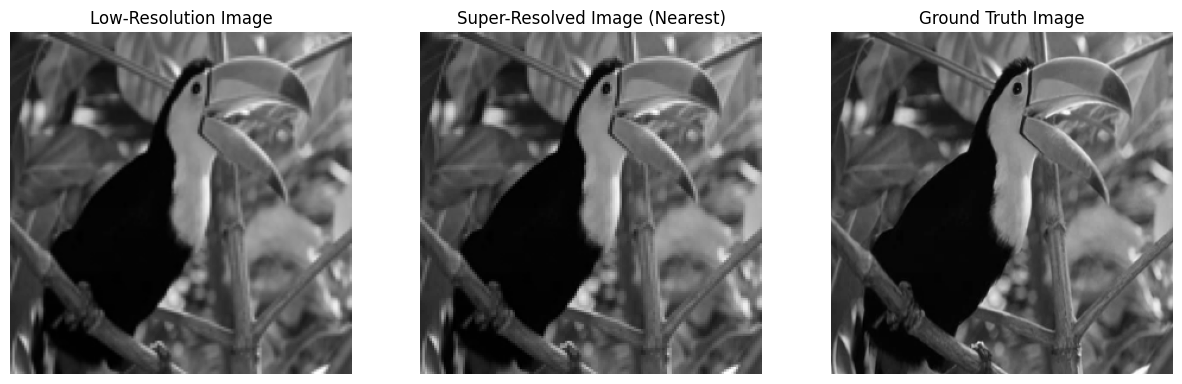

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import skimage.transform
import matplotlib.pyplot as plt

def compute_psnr(hr_image, sr_image):
    """
    Compute Peak Signal-to-Noise Ratio (PSNR).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        psnr_value: PSNR value in dB.
    """
    mse = np.mean((hr_image - sr_image) ** 2)
    if mse == 0:
        return float('inf')  # PSNR is infinite for identical images
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

def compute_ssim(hr_image, sr_image):
    """
    Compute Structural Similarity Index (SSIM).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        ssim_value: SSIM value in the range [-1, 1].
    """
    ssim_value, _ = ssim(hr_image, sr_image, full=True)
    return ssim_value

def compute_mse(hr_image, sr_image):
    """
    Compute Mean Squared Error (MSE).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        mse_value: MSE value.
    """
    mse_value = np.mean((hr_image - sr_image) ** 2)
    return mse_value

def interpolation_lib(img, mode_type, factor=None):
    """
    Perform image interpolation using various methods.
    Args:
        img: Input low-resolution image (2D array).
        mode_type: Interpolation method (e.g., 'Cubic', 'Linear').
        factor: Scaling factor for upscaling.
    Returns:
        img: Super-resolved image (2D array).
    """
    if mode_type == "Cubic Spline":
        img = skimage.transform.resize(
            img, (img.shape[0] * factor, img.shape[1] * factor), order=3, anti_aliasing=False
        )
        return img
    elif mode_type == "Linear":
        mode = cv2.INTER_LINEAR
    elif mode_type == "Nearest":
        mode = cv2.INTER_NEAREST
    elif mode_type == "Cubic":
        mode = cv2.INTER_CUBIC
    elif mode_type == "Lanczos4":
        mode = cv2.INTER_LANCZOS4
    else:
        raise ValueError(f"Unknown mode_type: {mode_type}")

    img = cv2.resize(img, (0, 0), fx=factor, fy=factor, interpolation=mode)
    return img

# Main code
if __name__ == "__main__":
    # Load low-resolution (LR) and ground truth high-resolution (HR) images
    lr_image = cv2.imread("/content/Set5/LRbicx2/bird.png", cv2.IMREAD_GRAYSCALE)
    hr_image = cv2.imread("/content/Set5/original/bird.png", cv2.IMREAD_GRAYSCALE)

    if lr_image is None or hr_image is None:
        raise FileNotFoundError("One or both input images not found!")

    # Perform interpolation using the desired method
    scale_factor = hr_image.shape[0] // lr_image.shape[0]  # Assuming square scaling
    interpolation_method = "Nearest"  # Change this to any of "Linear", "Nearest", "Cubic", "Lanczos4", or "Cubic Spline"
    sr_image = interpolation_lib(lr_image, interpolation_method, factor=scale_factor)

    # Compute PSNR, SSIM, and MSE
    psnr_value = compute_psnr(hr_image, sr_image)
    ssim_value = compute_ssim(hr_image, sr_image)
    mse_value = compute_mse(hr_image, sr_image)

    # Print the metrics
    print(f"Interpolation Method: {interpolation_method}")
    print(f"PSNR: {psnr_value:.2f} dB")
    print(f"SSIM: {ssim_value:.4f}")
    print(f"MSE: {mse_value:.4f}")

    # Visualize the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Low-Resolution Image")
    plt.imshow(lr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title(f"Super-Resolved Image ({interpolation_method})")
    plt.imshow(sr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Ground Truth Image")
    plt.imshow(hr_image, cmap="gray")
    plt.axis("off")

    plt.show()


Interpolation Method: Lanczos4
PSNR: 38.15 dB
SSIM: 0.9786
MSE: 9.9603


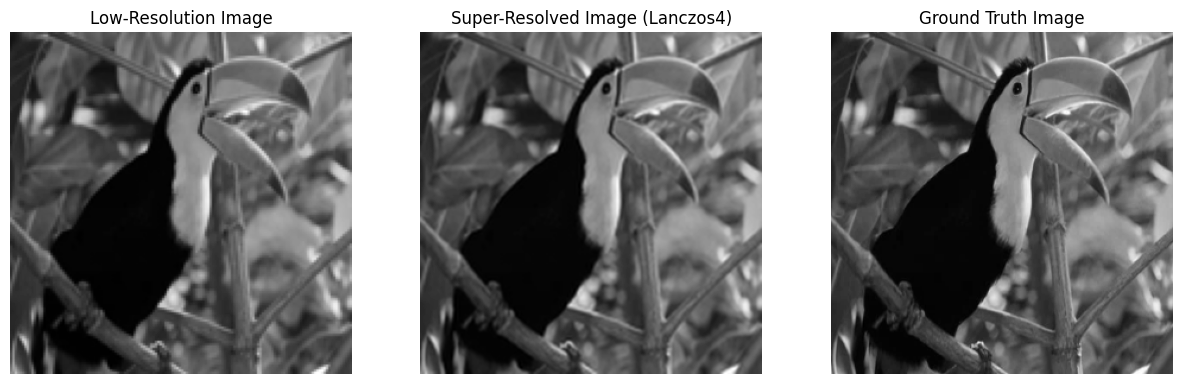

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import skimage.transform
import matplotlib.pyplot as plt

def compute_psnr(hr_image, sr_image):
    """
    Compute Peak Signal-to-Noise Ratio (PSNR).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        psnr_value: PSNR value in dB.
    """
    mse = np.mean((hr_image - sr_image) ** 2)
    if mse == 0:
        return float('inf')  # PSNR is infinite for identical images
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

def compute_ssim(hr_image, sr_image):
    """
    Compute Structural Similarity Index (SSIM).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        ssim_value: SSIM value in the range [-1, 1].
    """
    ssim_value, _ = ssim(hr_image, sr_image, full=True)
    return ssim_value

def compute_mse(hr_image, sr_image):
    """
    Compute Mean Squared Error (MSE).
    Args:
        hr_image: Ground truth high-resolution image (2D array).
        sr_image: Super-resolved image (2D array).
    Returns:
        mse_value: MSE value.
    """
    mse_value = np.mean((hr_image - sr_image) ** 2)
    return mse_value

def interpolation_lib(img, mode_type, factor=None):
    """
    Perform image interpolation using various methods.
    Args:
        img: Input low-resolution image (2D array).
        mode_type: Interpolation method (e.g., 'Cubic', 'Linear').
        factor: Scaling factor for upscaling.
    Returns:
        img: Super-resolved image (2D array).
    """
    if mode_type == "Cubic Spline":
        img = skimage.transform.resize(
            img, (img.shape[0] * factor, img.shape[1] * factor), order=3, anti_aliasing=False
        )
        return img
    elif mode_type == "Linear":
        mode = cv2.INTER_LINEAR
    elif mode_type == "Nearest":
        mode = cv2.INTER_NEAREST
    elif mode_type == "Cubic":
        mode = cv2.INTER_CUBIC
    elif mode_type == "Lanczos4":
        mode = cv2.INTER_LANCZOS4
    else:
        raise ValueError(f"Unknown mode_type: {mode_type}")

    img = cv2.resize(img, (0, 0), fx=factor, fy=factor, interpolation=mode)
    return img

# Main code
if __name__ == "__main__":
    # Load low-resolution (LR) and ground truth high-resolution (HR) images
    lr_image = cv2.imread("/content/Set5/LRbicx2/bird.png", cv2.IMREAD_GRAYSCALE)
    hr_image = cv2.imread("/content/Set5/original/bird.png", cv2.IMREAD_GRAYSCALE)

    if lr_image is None or hr_image is None:
        raise FileNotFoundError("One or both input images not found!")

    # Perform interpolation using the desired method
    scale_factor = 2#hr_image.shape[0] // lr_image.shape[0]  # Assuming square scaling
    interpolation_method = "Lanczos4"  # Change this to any of "Linear", "Nearest", "Cubic", "Lanczos4", or "Cubic Spline"
    sr_image = interpolation_lib(lr_image, interpolation_method, factor=scale_factor)

    # Compute PSNR, SSIM, and MSE
    psnr_value = compute_psnr(hr_image, sr_image)
    ssim_value = compute_ssim(hr_image, sr_image)
    mse_value = compute_mse(hr_image, sr_image)

    # Print the metrics
    print(f"Interpolation Method: {interpolation_method}")
    print(f"PSNR: {psnr_value:.2f} dB")
    print(f"SSIM: {ssim_value:.4f}")
    print(f"MSE: {mse_value:.4f}")

    # Visualize the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Low-Resolution Image")
    plt.imshow(lr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title(f"Super-Resolved Image ({interpolation_method})")
    plt.imshow(sr_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Ground Truth Image")
    plt.imshow(hr_image, cmap="gray")
    plt.axis("off")

    plt.show()
